# Blueprint Workshop walkthrough notebook

In [1]:
import datarobot as dr

In [2]:
from datarobot_bp_workshop import Workshop, Visualize

In [3]:
with open('../api.token', 'r') as f:
    token = f.read()
    dr.Client(token=token, endpoint='https://app.datarobot.com/api/v2')

## Initialize the workshop

In [4]:
w = Workshop()

## Construct a blueprint

In [5]:
w.Task('PNI2')

Missing Values Imputed (quick median) (PNI2)

Input Summary: (None)
Output Method: TaskOutputMethod.TRANSFORM

In [6]:
w.Tasks.PNI2()

Missing Values Imputed (quick median) (PNI2)

Input Summary: (None)
Output Method: TaskOutputMethod.TRANSFORM

In [7]:
pni = w.Tasks.PNI2(w.TaskInputs.NUM)
rdt = w.Tasks.RDT5(pni)
binning = w.Tasks.BINNING(pni)
keras = w.Tasks.KERASC(rdt, binning)
keras.set_task_parameters_by_name(learning_rate=0.123)
keras_blueprint = w.BlueprintGraph(keras, name='A blueprint I made with the Python API').save()

In [8]:
user_blueprint_id = keras_blueprint.user_blueprint_id

## Visualize a blueprint

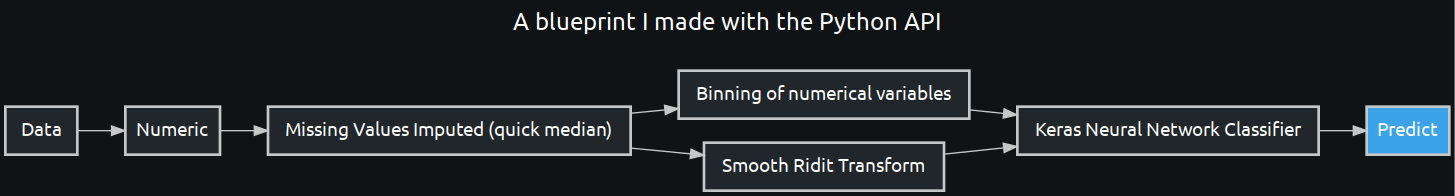

In [9]:
keras_blueprint.show()

## Inspect tasks

In [10]:
pni

Missing Values Imputed (quick median) (PNI2)

Input Summary: Numeric Data
Output Method: TaskOutputMethod.TRANSFORM

In [11]:
rdt

Smooth Ridit Transform (RDT5)

Input Summary: Missing Values Imputed (quick median) (PNI2)
Output Method: TaskOutputMethod.TRANSFORM

In [12]:
binning

Binning of numerical variables (BINNING)

Input Summary: Missing Values Imputed (quick median) (PNI2)
Output Method: TaskOutputMethod.TRANSFORM

In [13]:
keras

Keras Neural Network Classifier (KERASC)

Input Summary: Smooth Ridit Transform (RDT5) | Binning of numerical variables (BINNING)
Output Method: TaskOutputMethod.PREDICT

Task Parameters:
  learning_rate (learning_rate) = 0.123

In [14]:
keras.task_parameters.learning_rate

0.123

In [15]:
keras.task_parameters.batch_size = 32

In [16]:
keras

Keras Neural Network Classifier (KERASC)

Input Summary: Smooth Ridit Transform (RDT5) | Binning of numerical variables (BINNING)
Output Method: TaskOutputMethod.PREDICT

Task Parameters:
  batch_size (batch_size) = 32
  learning_rate (learning_rate) = 0.123

In [17]:
keras_blueprint

Name: 'A blueprint I made with the Python API'

Input Data: Numeric
Tasks: Missing Values Imputed (quick median) | Smooth Ridit Transform | Binning of numerical variables | Keras Neural Network Classifier

## Validation

Intentionally provide the wrong input data type to test validation.

In [18]:
pni = w.Tasks.PNI2(w.TaskInputs.CAT)
rdt = w.Tasks.RDT5(pni)
binning = w.Tasks.BINNING(pni)
keras = w.Tasks.KERASC(rdt, binning)
keras.set_task_parameters_by_name(learning_rate=0.123)
invalid_keras_blueprint = w.BlueprintGraph(keras)

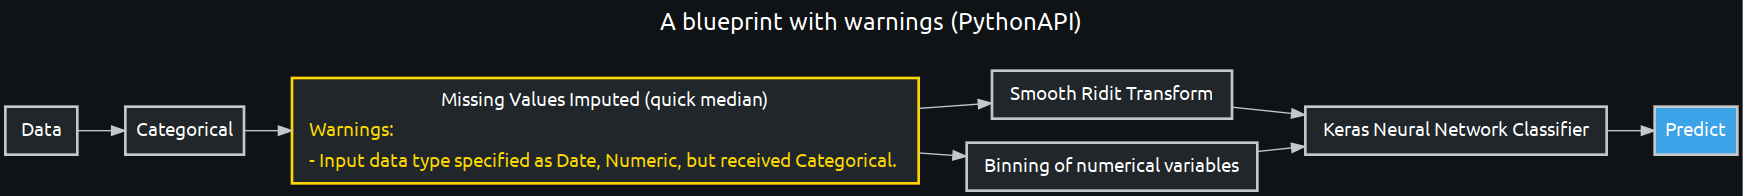

In [19]:
invalid_keras_blueprint.save('A blueprint with warnings (PythonAPI)', user_blueprint_id=user_blueprint_id).show()

In [20]:
binning.set_task_parameters_by_name(max_bins=-22)

Binning of numerical variables (BINNING)

Input Summary: Missing Values Imputed (quick median) (PNI2)
Output Method: TaskOutputMethod.TRANSFORM

Task Parameters:
  max_bins (b) = -22

Binning of numerical variables (BINNING)

  Invalid value(s) supplied
    max_bins (b) = -22
      - Must be a 'intgrid' parameter defined by: [2, 500]

Failed to save: parameter validation failed.


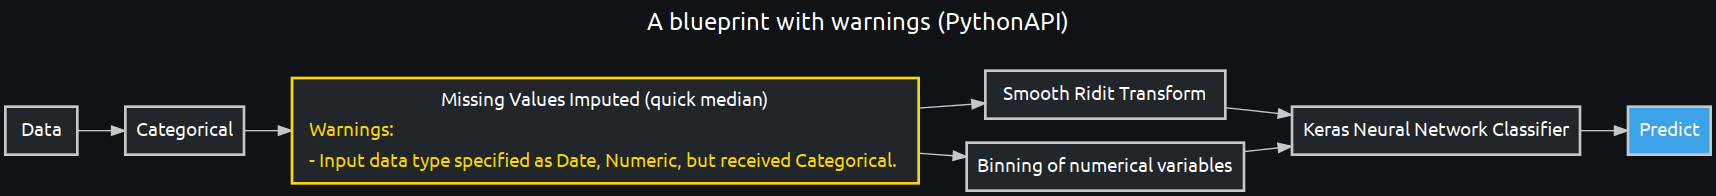

In [21]:
invalid_keras_blueprint.save('A blueprint with warnings (PythonAPI)', user_blueprint_id=user_blueprint_id).show()

In [22]:
keras.validate_task_parameters()

Keras Neural Network Classifier (KERASC)

All parameters valid!



## Update to the original valid blueprint

In [23]:
pni = w.Tasks.PNI2(w.TaskInputs.NUM)
rdt = w.Tasks.RDT5(pni)
binning = w.Tasks.BINNING(pni)
keras = w.Tasks.KERASC(rdt, binning)
keras.set_task_parameters_by_name(learning_rate=0.123)
keras_blueprint = w.BlueprintGraph(keras)
blueprint_graph = keras_blueprint.save('A blueprint I made with the Python API', user_blueprint_id=user_blueprint_id)

## Get help with tasks

In [24]:
help(w.Tasks.PNI2)

Help on PNI2 in module datarobot_bp_workshop.factories object:

class PNI2(datarobot_bp_workshop.friendly_repr.FriendlyRepr)
 |  Missing Values Imputed (quick median)
 |  
 |  Impute missing values on numeric variables with their median and create indicator variables to mark imputed records 
 |  
 |  Parameters
 |  ----------
 |  output_method: string, one of (TaskOutputMethod.TRANSFORM).
 |  task_parameters: dict, which may contain:
 |  
 |    scale_small (s): select, (Default=0)
 |      Possible Values: [False, True]
 |  
 |    threshold (t): int, (Default=10)
 |      Possible Values: [1, 99999]
 |  
 |  Method resolution order:
 |      PNI2
 |      datarobot_bp_workshop.friendly_repr.FriendlyRepr
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(zelf, *inputs, output_method=None, task_parameters=None, output_method_parameters=None, x_transformations=None, y_transformations=None, freeze=False, version=None)
 |  
 |  __friendly_repr__(zelf)
 |  
 |  documentatio

## List task categories

In [25]:
w.list_categories(show_tasks=True)

Custom

  - Awesome Model (CUSTOMR_6019ae978cc598a46199cee1)
  - "My Custom Task" (CUSTOMR_608e42ac186a7242380a6a98)
  - "My Custom Task" (CUSTOMR_608e42ecd5eb0dc5f28d0dda)
  - "My Custom Task" (CUSTOMR_608e43fc01f9f466aa8d0d81)
  - My Custom Ridge Regressor w/ Imputation (CUSTOMR_608e5a4ed5eb0dc5f28d0ea0)
  - My Custom Ridge Regressor w/ Imputation (CUSTOMR_608e5bc8b66a4934d58d0d4e)
  - My Custom Ridge Regressor w/ Imputation (CUSTOMR_608ef72b6f13f54305667783)
  - My Custom Ridge Regressor w/ Imputation (CUSTOMR_608ef74c5dda651931052422)
  - Second model (CUSTOMC_6019d18adfa83afbad99cdb8)
  - My Imputation Task (CUSTOMT_6188b0e6fb465717f029fd05)
  - Image Featurizer (CUSTOMT_61b452e57fd5b0629a2f4fd3)
  - Maybe Broken? (CUSTOMT_61b7d3f26f8e01a1a8f7bc0c)
Preprocessing

  Numeric Preprocessing

    Data Quality

      - Numeric Data Cleansing (NDC)
    Dimensionality Reducer

      - Truncated Singular Value Decomposition (SVD2)
      - Partial Principal Components Analysis (PPCA)
      

## Search for tasks by name

In [26]:
w.search_tasks('keras')

Keras Autoencoder with Calibration: [KERAS_AUTOENCODER_CAL] 
  - Keras Autoencoder for Anomaly Detection with Calibration


Keras Autoencoder: [KERAS_AUTOENCODER] 
  - Keras Autoencoder for Anomaly Detection


Keras Neural Network Classifier: [KERASC] 
  - Keras Neural Network Classifier


Keras Neural Network Classifier: [KERASMULTIC] 
  - Keras Neural Network Multi-Class Classifier


Keras Neural Network Regressor: [KERASR] 
  - Keras Neural Network Regressor


Keras Variational Autoencoder with Calibration: [KERAS_VARIATIONAL_AUTOENCODER_CAL] 
  - Keras Variational Autoencoder for Anomaly Detection with Calibration


Keras Variational Autoencoder: [KERAS_VARIATIONAL_AUTOENCODER] 
  - Keras Variational Autoencoder for Anomaly Detection


Keras encoding of text variables: [KERAS_TOKENIZER] 
  - Text encoding based on Keras Tokenizer class


Regularized Quantile Regressor with Keras: [KERAS_REGULARIZED_QUANTILE_REG] 
  - Regularized Quantile Regression implemented in Keras

## Search custom tasks

In [27]:
w.search_tasks('Awesome')

Awesome Model: [CUSTOMR_6019ae978cc598a46199cee1] 
  - This is the best model ever.

## Flexible search

In [28]:
w.search_tasks('bins')

Binning of numerical variables: [BINNING] 
  - Bin numerical values into non-uniform bins using decision trees


Elastic-Net Regressor (L1 / Least-Squares Loss) with Binned numeric features: [BENETCD2] 
  - Bin numerical values into non-uniform bins using decision trees, followed by Elasticnet model using block coordinate descent-- a common form of derivated-free optimization. Based on lightning CDRegressor.

In [29]:
w.search_tasks('Pre-proc')

In [30]:
[a.task_code for a in w.search_tasks('decision')]

['BINNING', 'BENETCD2', 'RFC', 'RFR']

In [31]:
w.Tasks.RFC

ExtraTrees Classifier (Gini): [RFC] 
  - Random Forests based on scikit-learn. Random forests are an ensemble method where hundreds (or thousands) of individual decision trees are fit to bootstrap re-samples of the original dataset.  ExtraTrees are a variant of RandomForests with even more randomness.

## Quick description

In [32]:
w.Tasks.PDM3.description

'One-Hot (or dummy-variable) transformation of categorical features'

## View documentation for a task

In [33]:
binning.documentation()

'https://app.datarobot.com/model-docs/tasks/BINNING-Binning-of-numerical-variables.html'

## View task parameter values

As an example, let's look at the Binning Task.

In [34]:
binning.get_task_parameter_by_name('max_bins')

20

## Modify a task parameter

In [35]:
binning.set_task_parameters_by_name(max_bins=22)

Binning of numerical variables (BINNING)

Input Summary: Missing Values Imputed (quick median) (PNI2)
Output Method: TaskOutputMethod.TRANSFORM

Task Parameters:
  max_bins (b) = 22

### Set task parameters with a key

Alternatively, use the short name directly.

In [36]:
binning.task_parameters.b = 22

## Validate parameters

In [37]:
binning.task_parameters.b = -22

In [38]:
binning.validate_task_parameters()

Binning of numerical variables (BINNING)

  Invalid value(s) supplied
    max_bins (b) = -22
      - Must be a 'intgrid' parameter defined by: [2, 500]



In [39]:
binning.set_task_parameters(b=22)

Binning of numerical variables (BINNING)

Input Summary: Missing Values Imputed (quick median) (PNI2)
Output Method: TaskOutputMethod.TRANSFORM

Task Parameters:
  max_bins (b) = 22

## Validate task parameters

In [40]:
binning.validate_task_parameters()

Binning of numerical variables (BINNING)

All parameters valid!



Update an existing blueprint in a personal repository by passing the `user_blueprint_id`.

In [41]:
blueprint_graph = keras_blueprint.save('A blueprint I made with the Python API (updated)', user_blueprint_id=user_blueprint_id)

In [42]:
assert user_blueprint_id == blueprint_graph.user_blueprint_id

## Retrieve a blueprint

You can retrieve a blueprint from your saved blueprints.

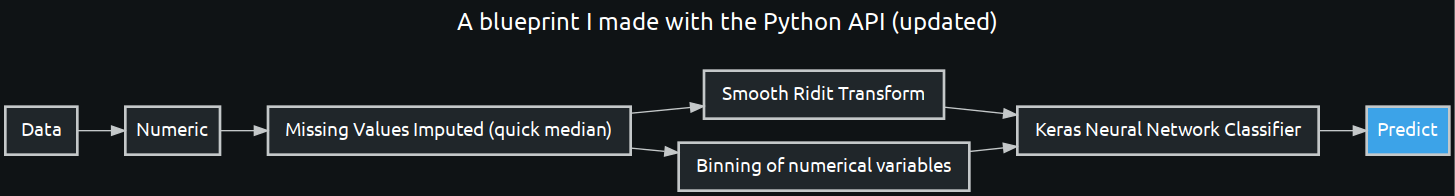

In [43]:
w.get(user_blueprint_id).show()

## Retrieve blueprints from a personal blueprint repository

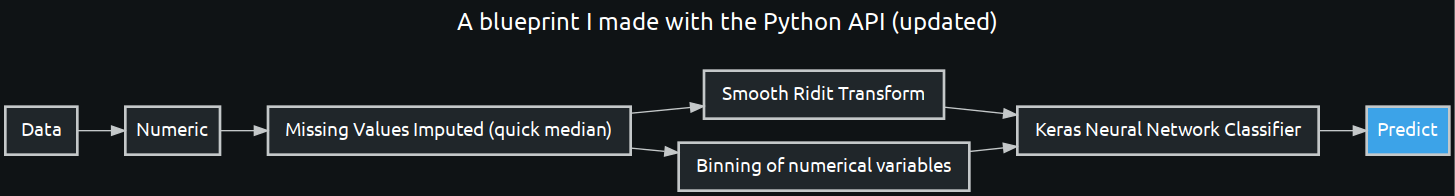

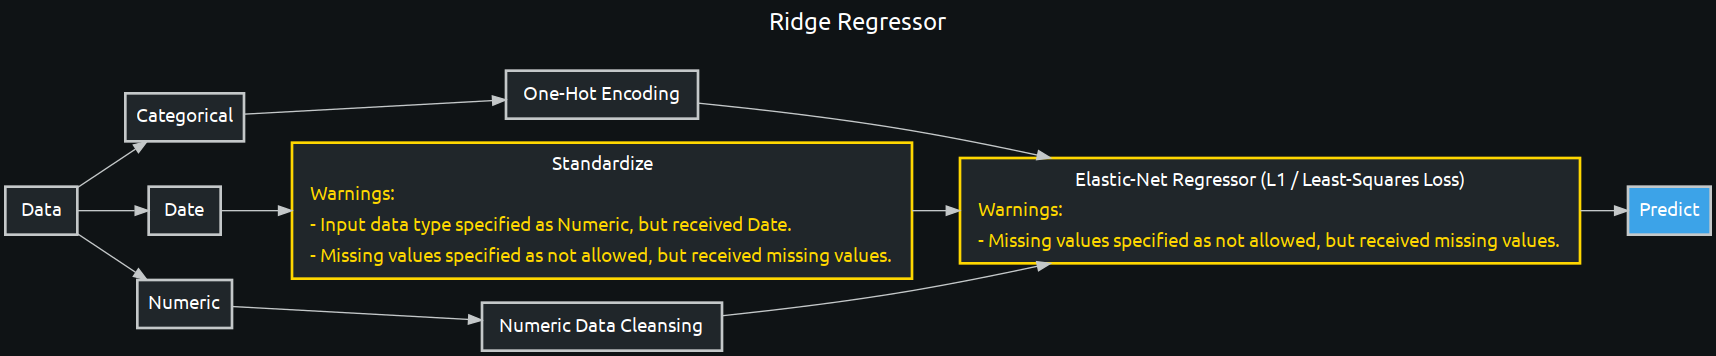

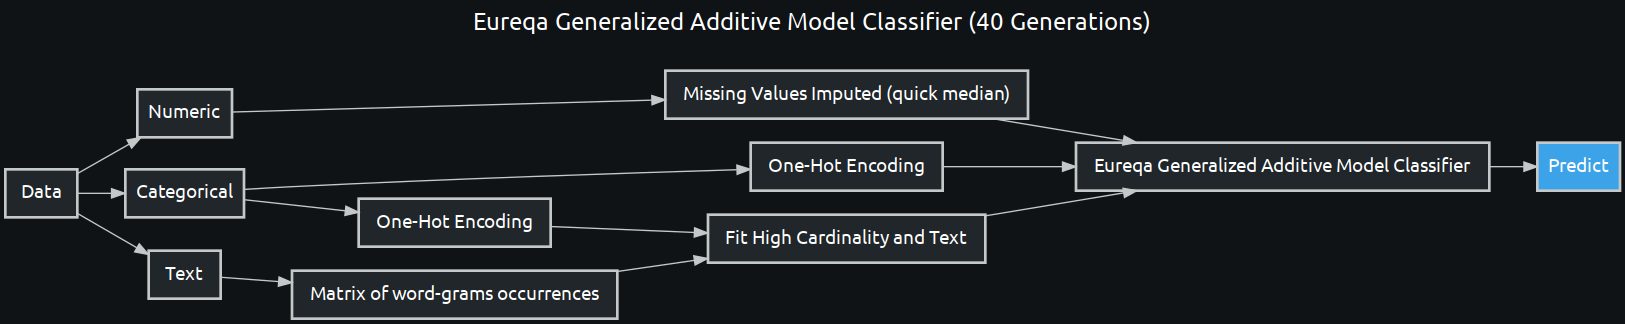

In [44]:
for bp in w.list(limit=3):
    bp.show()

## Delete a blueprint from your personal repository

In [45]:
w.delete(user_blueprint_id)

Blueprints deleted.


## Retrieve Leaderboard blueprints via the Workshop

In [46]:
project_id = '5eb9656901f6bb026828f14e'
project = dr.Project.get(project_id)
menu = project.get_blueprints()

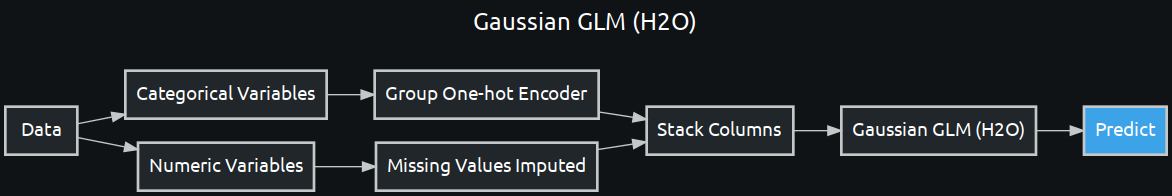

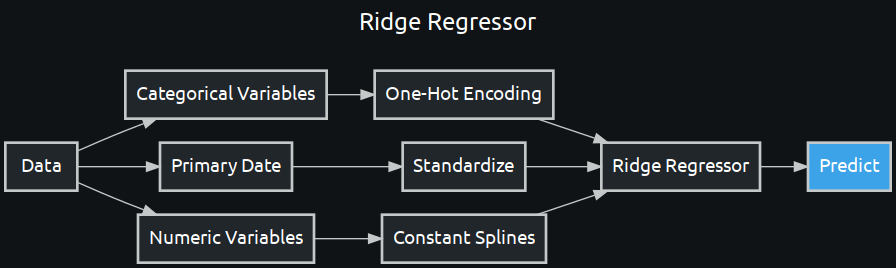

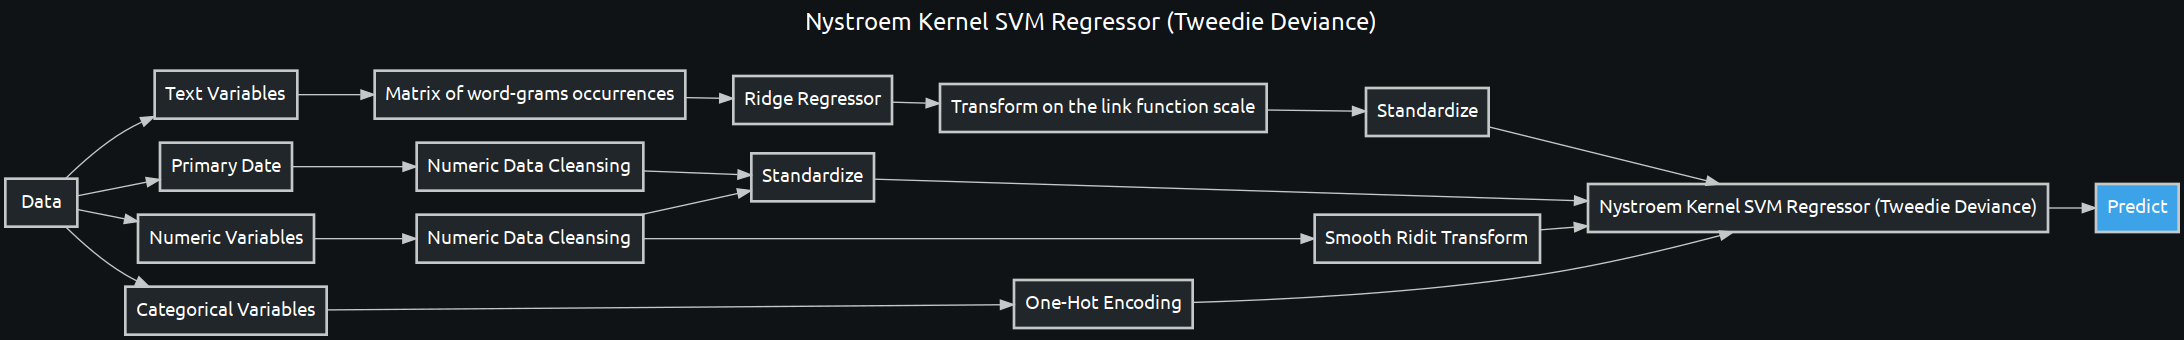

In [47]:
for bp in menu[6:9]:
    Visualize.show_dr_blueprint(bp)

## Clone a blueprint from the Leaderboard

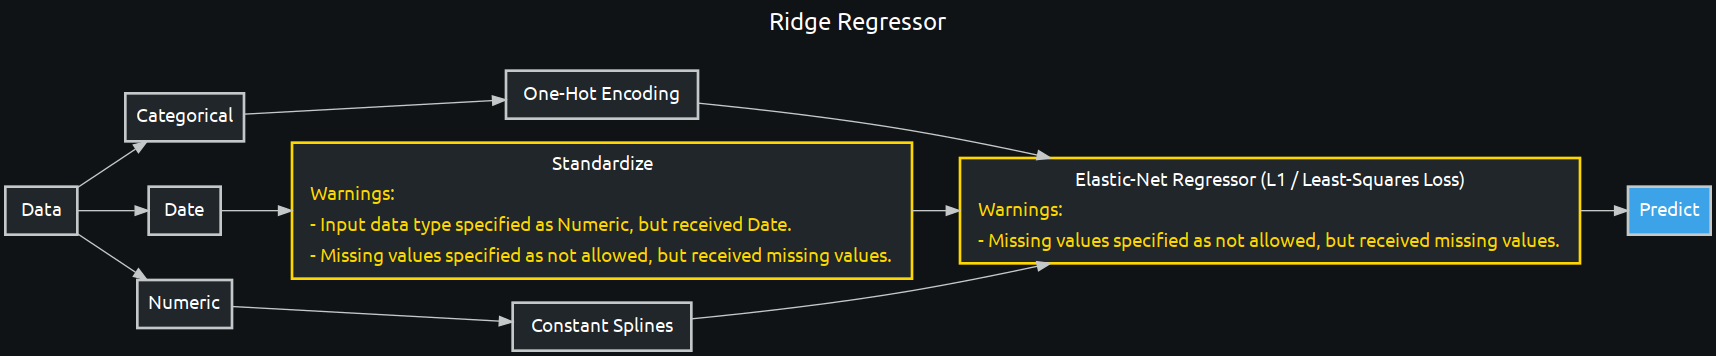

In [48]:
ridge = menu[7]
blueprint_graph = w.clone(blueprint_id=ridge.id, project_id=project_id)
blueprint_graph.show()

In [49]:
ridge.id, project_id

('1774086bd8bfd4e1f45c5ff503a99ee2', '5eb9656901f6bb026828f14e')

## Any blueprint can be used as a tutorial

In [50]:
source_code = blueprint_graph.to_source_code(to_stdout=True)

w = Workshop(user_blueprint_id='61d4dda0addc0e8a29404b9b')

rst = w.Tasks.RST(w.TaskInputs.DATE)

pdm3 = w.Tasks.PDM3(w.TaskInputs.CAT)
pdm3.set_task_parameters(cm=500, sc=25)

gs = w.Tasks.GS(w.TaskInputs.NUM)

enetcd = w.Tasks.ENETCD(rst, pdm3, gs)
enetcd.set_task_parameters(a=0)

enetcd_blueprint = w.BlueprintGraph(enetcd, name='Ridge Regressor')


## Execute a blueprint

In [51]:
eval(compile(source_code, 'blueprint', 'exec'))

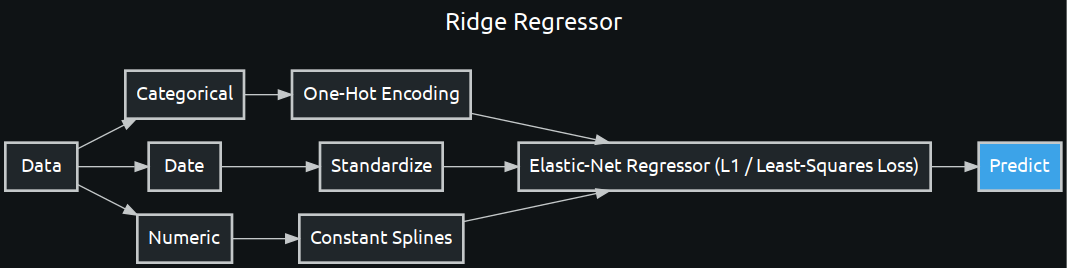

In [52]:
enetcd_blueprint.show()

## Delete the original blueprint directly

In [53]:
blueprint_graph.delete()

Blueprint deleted.


## Modify the source code

In [54]:
#w = Workshop()

rst = w.Tasks.RST(w.TaskInputs.DATE)

# Use numeric data cleansing instead
ndc = w.Tasks.NDC(w.TaskInputs.NUM)

pdm3 = w.Tasks.PDM3(w.TaskInputs.CAT)
pdm3.set_task_parameters(cm=500, sc=25)

enetcd = w.Tasks.ENETCD(rst, ndc, pdm3)
enetcd.set_task_parameters(a=0.0)

enetcd_blueprint = w.BlueprintGraph(enetcd, name='Ridge Regressor')

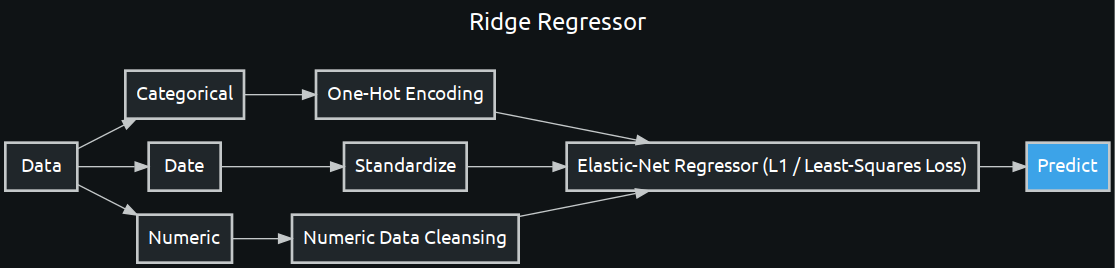

In [55]:
enetcd_blueprint.show()

## Add a blueprint to a project and train It

In [56]:
project_id = '5eb9656901f6bb026828f14e'

In [57]:
enetcd_blueprint.save()

Name: 'Ridge Regressor'

Input Data: Date | Categorical | Numeric
Tasks: Standardize | One-Hot Encoding | Numeric Data Cleansing | Elastic-Net Regressor (L1 / Least-Squares Loss)

In [58]:
enetcd_blueprint.train(project_id=project_id)

Training requested! Blueprint Id: fa329535f1e5f5465e2c55024aacb910


Name: 'Ridge Regressor'

Input Data: Date | Categorical | Numeric
Tasks: Standardize | One-Hot Encoding | Numeric Data Cleansing | Elastic-Net Regressor (L1 / Least-Squares Loss)

## Custom Models

### Find tasks

In [59]:
w.search_tasks('awesome model')

Awesome Model: [CUSTOMR_6019ae978cc598a46199cee1] 
  - This is the best model ever.

In [60]:
w.CustomTasks.CUSTOMR_6019ae978cc598a46199cee1

Awesome Model: [CUSTOMR_6019ae978cc598a46199cee1] 
  - This is the best model ever.

In [61]:
w.CustomTasks.CUSTOMR_6019ae978cc598a46199cee1(w.TaskInputs.NUM)

Awesome Model (CUSTOMR_6019ae978cc598a46199cee1)

Input Summary: Numeric Data
Output Method: TaskOutputMethod.PREDICT

Task Parameters:
  version_id (version_id) = latest_6019ae978cc598a46199cee1

In [62]:
w.CustomTask('CUSTOMR_6019ae978cc598a46199cee1')

Awesome Model (CUSTOMR_6019ae978cc598a46199cee1)

Input Summary: (None)
Output Method: TaskOutputMethod.PREDICT

Task Parameters:
  version_id (version_id) = latest_6019ae978cc598a46199cee1

In [63]:
w.CustomTasks.CUSTOMR_6019ae978cc598a46199cee1.versions

Latest (latest_6019ae978cc598a46199cee1): str

v3.0 (6019e2418311cc8207a5f8e1): str

v2.10 (6019dff0509159ede309f9c9): str

v2.9 (6019dc3b8311cc8207a5f7d9): str

v2.8 (6019dbcb4f6322a6283883d9): str

v2.7 (6019db4d041c71bd7ea1c670): str

v2.6 (6019da5d4f6322a628388364): str

v2.5 (6019d924be257008648e3c62): str

v2.4 (6019d7db3d7d080b078e3c39): str

v2.3 (6019d744356f3c430b38828d): str

v2.2 (6019d305be257008648e3c0c): str

v2.1 (6019d2e045e619fc03a2eead): str

v2.0 (6019d2bd3d7d080b078e3b66): str

v1.3 (6019cf0735270cbe238e3c76): str

v1.2 (6019b9fdbf5b0a42aba1c6e9): str

v1.1 (6019b81729ae9ab5ad8e3c26): str

v1.0 (6019afe4dcd97e1e5ebfee13): str

### Build a blueprint

In [64]:
pni = w.Tasks.PNI2(w.TaskInputs.NUM)
rdt = w.Tasks.RDT5(pni)
binning = w.Tasks.BINNING(pni)
customr = w.CustomTasks.CUSTOMR_6019ae978cc598a46199cee1(rdt, binning)
custom_bp = w.BlueprintGraph(customr, name='My Fun Custom Blueprint').save()

### Update task versions

In [65]:
customr.version = w.CustomTasks.CUSTOMR_6019ae978cc598a46199cee1.versions.v2_7

In [66]:
customr

Awesome Model (CUSTOMR_6019ae978cc598a46199cee1)

Input Summary: Smooth Ridit Transform (RDT5) | Binning of numerical variables (BINNING)
Output Method: TaskOutputMethod.PREDICT

Task Parameters:
  version_id (version_id) = 6019db4d041c71bd7ea1c670

In [67]:
customr.version = w.CustomTasks.CUSTOMR_6019ae978cc598a46199cee1.versions.Latest

In [68]:
custom_bp.save()

Name: 'My Fun Custom Blueprint'

Input Data: Numeric
Tasks: Missing Values Imputed (quick median) | Smooth Ridit Transform | Binning of numerical variables | Awesome Model

### Find, View, and Train

In [69]:
bps = w.list(limit=3)

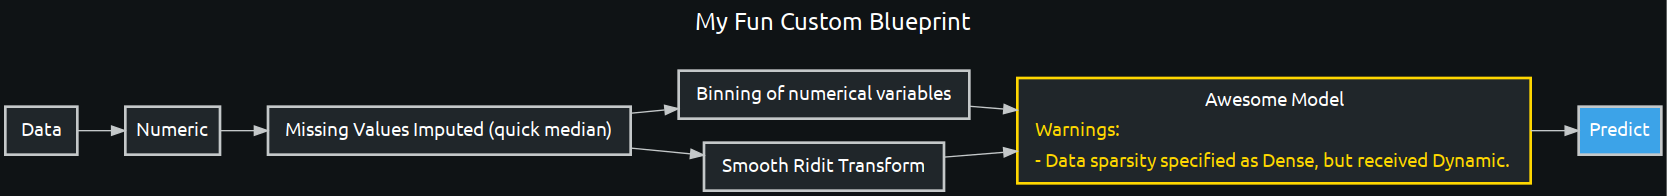

In [70]:
list(bps)[0].show()

In [71]:
custom_bp.train(project_id=project_id)

Training requested! Blueprint Id: 3d753707758ad45b97684811a8756c20


Name: 'My Fun Custom Blueprint'

Input Data: Numeric
Tasks: Missing Values Imputed (quick median) | Smooth Ridit Transform | Binning of numerical variables | Awesome Model

In [72]:
custom_bp.delete()

Blueprint deleted.
